In [238]:
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt 
import numpy as np
import itertools  
# import sets
import collections as clt
import os
import sys
import difflib as dl  
import re
import timeit
from Input import DataReader, DataSelection
import Plot as pltdat

%reload_ext autoreload

%aimport Input
%aimport Plot

%autoreload 1
%matplotlib inline

# mplt.get_configdir()

In [221]:
mpl.matplotlib_fname()

'/home/mlueckhof/.local/lib/python3.6/site-packages/matplotlib/mpl-data/matplotlibrc'

Data Input Level
=========
Data input by using methods from class Input

In [243]:
Storage = DataReader(path = ['/home/mlueckhof/Codes/Projects/FCCee/Default/Data/'])
DFseco_col = Storage.readG4out(read = 'secondaries', datType = 'default', verbose = 2)

# beamTypes, beamSizes = Storage.beamList, Storage.beamSizes


files are in: ['/home/mlueckhof/Codes/Projects/FCCee/Default/Data/']
 *********************************************** 
 accessing directory: /home/mlueckhof/Codes/Projects/FCCee/Default/Data/ ...
 subdirectories exist for following optics: 
 ['fcc_ee_t_85_by2_nosol', 'fcc_ee_t_205_nosol'] 
 -----------------------------
list of files: []
 accessing directory: /home/mlueckhof/Codes/Projects/FCCee/Default/Data/fcc_ee_t_85_by2_nosol ...
    ==> no subdirectories.
    ==> found data.
['fcc_ee_t_85_by2_nosol_gauss1_seco_ntuple.out', 'fcc_ee_t_85_by2_nosol_gauss1_prim_ntuple.out', 'fcc_ee_t_85_by2_nosol_ring10_seco_ntuple.out', 'fcc_ee_t_85_by2_nosol_seco_ntuple.out', 'fcc_ee_t_85_by2_nosol_ring10_prim_ntuple.out', 'fcc_ee_t_85_by2_nosol_flat5_seco_ntuple.out', 'fcc_ee_t_85_by2_nosol_prim_ntuple.out', 'fcc_ee_t_85_by2_nosol_flat5_prim_ntuple.out']
list of files: ['/home/mlueckhof/Codes/Projects/FCCee/Default/Data/fcc_ee_t_85_by2_nosol/fcc_ee_t_85_by2_nosol_gauss1_seco_ntuple.out', '/home/mlu

Data Visualization Level
==============
At this stage, the data can be plotted using the methods from class VisSRDat

In [244]:
Selection = DataSelection(DFseco_col)
def_opt = Selection.opticsSelection(optics = ['fcc_ee_t_85_by2_nosol','fcc_ee_t_205_nosol'], verbose = 0)
beamTypes, beamSizes = Selection.get_beamShapes_and_Size(verbose = 1)

*-*-*-*-*-*-*-*-*-*-*-*-* 
 Available types: {'flat', 'gauss', 'pencil', 'ring'} 
 Available sizes: {0, 1, 10, 5}


Found no collimator frame - analysing default data 
 -----------------------------
Type gauss selected, with size 1 sigma
Type gauss selected, with size 5 sigma
Type flat selected, with size 1 sigma
Type flat selected, with size 5 sigma


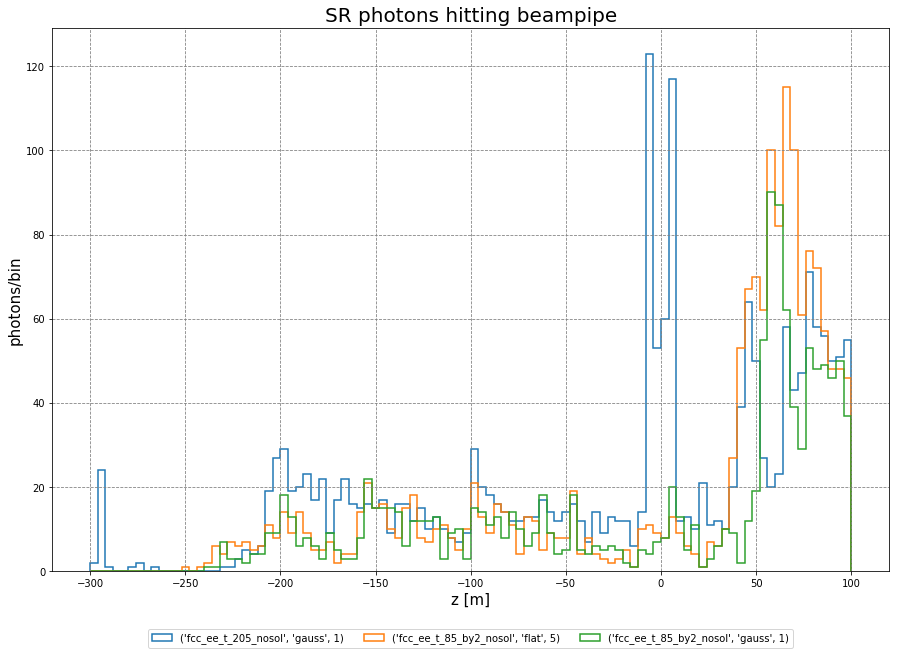

In [247]:
plotpath = '/home/mlueckhof/Codes/MDI/Analysis_Processing/Analysis/Plots/'
pltdat.plot_diffBeamShape(def_opt, plotpath, beamTypes, beamSizes, Type = 'hit', 
                          beam = ['gauss','flat'], size = [1,5], verbose = 0, save = 0)

Photon Collimation
=========== 

 *********************************************** 
 accessing directory: /home/mlueckhof/Codes/Projects/FCCee/Default/Data/
  ==> no sub directories.
  ==> found data
    --> added following files: 
  ['fcc_ee_t_85_by2_nosol_seco_ntuple.out']
 *********************************************** 
 filling data frames
 --> appending file /home/mlueckhof/Codes/Projects/FCCee/Default/Data/fcc_ee_t_85_by2_nosol_seco_ntuple.out ...
done.
 *********************************************** 
 accessing directory: /home/mlueckhof/Codes/Projects/FCCee/Collimator/Data/
  ==> no sub directories.
  ==> found data
    --> added following files: 
  ['fcc_ee_t_85_by2_nosol_coll_3015_seco_ntuple.out', 'fcc_ee_t_85_by2_nosol_coll_1030_seco_ntuple.out', 'fcc_ee_t_85_by2_nosol_coll_3010_seco_ntuple.out', 'fcc_ee_t_85_by2_nosol_coll_2030_seco_ntuple.out', 'fcc_ee_t_85_by2_nosol_coll_1530_seco_ntuple.out', 'fcc_ee_t_85_by2_nosol_coll_3020_seco_ntuple.out', 'fcc_ee_t_85_by2_nosol_coll_3030_seco_ntuple.out']
 *******

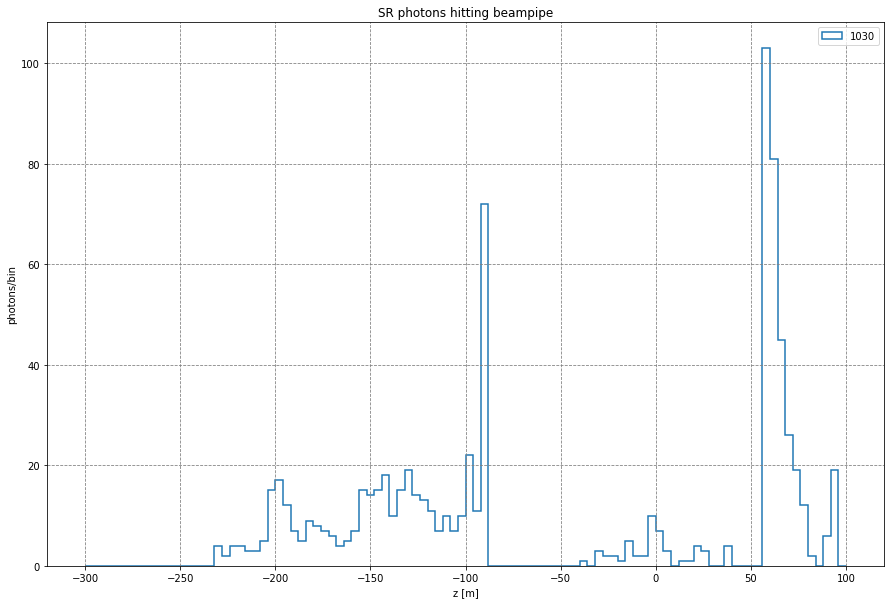

In [18]:
# create the DF's - collimation should be grouped as several cases have to be studied.
#
originSR_col = DataReader(path='/home/mlueckhof/Codes/Projects/FCCee/Collimator/')

# originSR_col = aper_select(originSR_col, aperture = [1030,3030])
# originSR_col.name = 'originSR_col'
# % timeit 
# pltdat.plot_data(originSR_def, Type = 'origin', save = 1)
plotpath = '/home/mlueckhof/Codes/MDI/Analysis_Processing/Analysis/Plots/'
# pltdat.plot_data(originSR_col, Type = 'hit', save = 1, aperture = [3010])
pltdat.plot_data(originSR_col, Type = 'hit', save = 1, aperture = [1030])

SR photons per element
======================

In [19]:
ElementName = 'BWL_2_15037_v'
originSR_Elm = FCCee_secondaries[(FCCee_secondaries.Creator == 'SynRad') & (FCCee_secondaries.charge == 0) &
                                 (FCCee_secondaries.name == ElementName)] 

event_last = 999999999
track_last = 999999999
vis = 1; save = 0 
nBin = 100

Z_org = []; Z_hit = []; E_org = []; E_hit = []; Material = []
for row in originSR_Elm.index:
    event = originSR_Elm.get_value(row,'Event')
    track = originSR_Elm.get_value(row,'Track')
    z_eu  = originSR_Elm.get_value(row,'z_eu')
    mat   = originSR_Elm.get_value(row,'Material')
    energ = originSR_Elm.get_value(row,'ptot')
    if(event_last != event or track_last != track):
        event_last = event
        track_last = track
        Z_org.append(z_eu)
        E_org.append(energ*10**6)
    elif(mat == 'Cu'):
        Z_hit.append(z_eu)
        E_hit.append(energ)

if(vis == 1):
    plt.figure(1)
    plt.title("Origin of SR photons")
    plt.rc('grid', linestyle="--", color='grey')
    plt.grid()
    plt.hist(Z_org, bins = nBin, range = (-550, 0))
    plt.xlabel("z [m]")
    plt.ylabel("photons/bin")
    if(save == 1):
        plt.savefig(plotpath+'SR_origin.pdf')
    else:
        pass

NameError: name 'FCCee_secondaries' is not defined